In [63]:
import numpy as np
import pandas as pd
from scipy.stats import binom, beta
import scipy as scs 
from matplotlib import pyplot as plt
import seaborn as sns

In [127]:
# We have a data set of size:
N = 100

# Success rates (sufficient stat.)
p1, p2 = 0.4, 0.66
N1 = p1*N               # number of hits in sample 1
N2 = p2*N                 # number of hits in sample 2

N1
N-N1                # number of failures

#data = binom.rvs(n, p, size=1000)
#np.mean(data)


60.0

In [165]:
# Prior1
a0, b0 = 1, 1
n0 = n1 = 1000                           #number of random samples to draw from posterior

r0post = beta.rvs(a0+N1, b0+N-N1,size = n0)
r0post.shape

# Prior2
a1, b1 = 1, 1
r1post = beta.rvs(a1+N2, b1+N-N2,size = n1)
r1post[:20]


array([ 0.63255702,  0.68082375,  0.64943952,  0.62947188,  0.68957051,
        0.6142298 ,  0.71547569,  0.60750659,  0.70774757,  0.64047877,
        0.63388294,  0.70744389,  0.57767674,  0.66736795,  0.75983363,
        0.71221944,  0.64611671,  0.6771338 ,  0.70101267,  0.69437861])

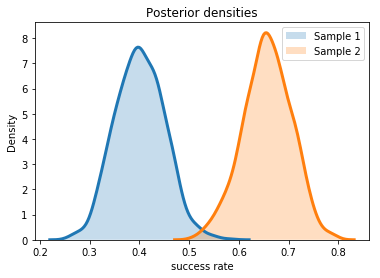

In [162]:
sns.distplot(r0post, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(r1post, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Plot formatting
plt.title('Posterior densities')
plt.xlabel('success rate')
plt.ylabel('Density')
plt.legend(['Sample 1','Sample 2'])

C:\Users\Alexander\Anaconda3\envs\MyEnv\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\Alexander\Anaconda3\envs\MyEnv\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


Text(0, 0.5, 'success rate 2')

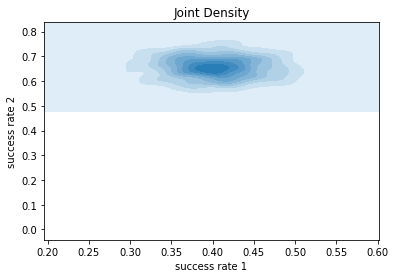

In [130]:
r = np.vstack([r0post, r1post]).T
r.shape

sns.distplot(r, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Plot formatting
plt.title('Joint Density')
plt.xlabel('success rate 1')
plt.ylabel('success rate 2')

Construct functions of the posterior sampled parameters:

In [155]:
delta = r1post-r0post                         # theta1 - theta2

lift = r1post/r0post

rel_delta = delta/r0post

log_odds = np.log(r1post/r0post)

Text(0, 0.5, 'Density')

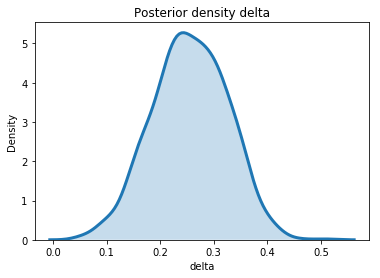

In [156]:
sns.distplot(delta, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Plot formatting
plt.title('Posterior density delta')
plt.xlabel('delta')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

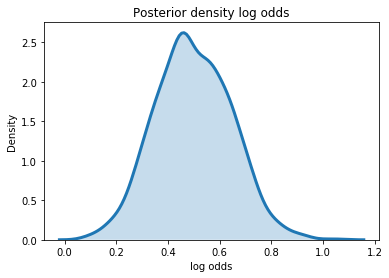

In [157]:
sns.distplot(log_odds, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Plot formatting
plt.title('Posterior density log odds')
plt.xlabel('log odds')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

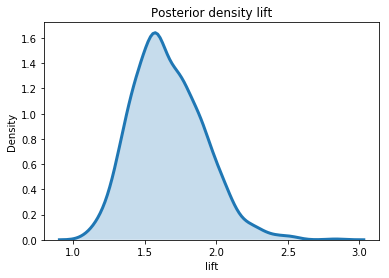

In [158]:
sns.distplot(lift, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Plot formatting
plt.title('Posterior density lift')
plt.xlabel('lift')
plt.ylabel('Density')

In [159]:
np.mean(r1post > r0post)
r1post > r0post

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [160]:
x = np.linspace(0, 1, 100)
y = beta.pdf(x, a0,b0)       # prior
y = beta.pdf(x, a0+N1,b0+N-N1)       # prior

Text(0, 0.5, 'Density')

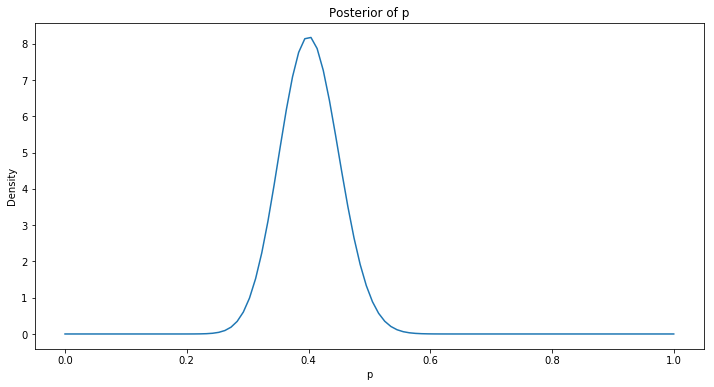

In [161]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, y)
plt.title('Posterior of p')
plt.xlabel('p')
plt.ylabel('Density')